In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


In [2]:
t = np.linspace(0, 1.0, 2001)
xlow = np.sin(2 * np.pi * 5 * t)
xhigh = np.sin(2 * np.pi * 250 * t)
x = xlow + xhigh


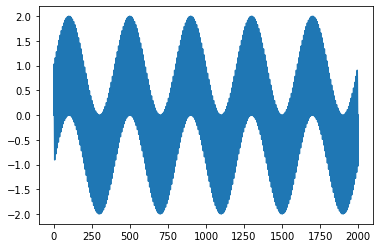

In [3]:
plt.plot(x)
plt.show()


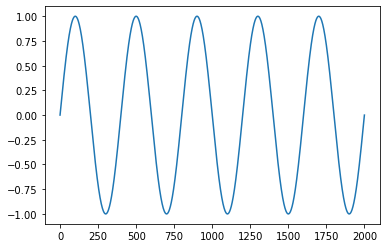

In [4]:
b, a = signal.butter(8, 0.125)
y = signal.filtfilt(b, a, x, padlen=125)
plt.plot(y)
plt.show()


In [6]:
signal.butter?

### Example #2

In [17]:
import numpy as np
from scipy.signal import butter,filtfilt# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples


In [22]:
# sin wave
sig = np.sin(1.2*2*np.pi*t)# Lets add some noise
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = sig + noise

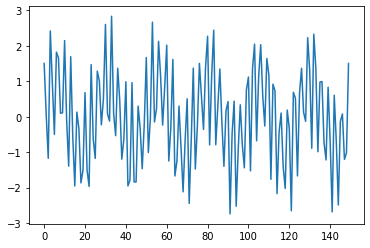

In [23]:
plt.plot(data)

In [24]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

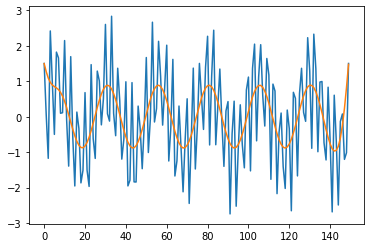

In [26]:
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.plot(data)
plt.plot(y)

In [20]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

NameError: name 'go' is not defined